## Realtime Word Synthesis using Preprocessed CALAM Dataset

#### Imports

In [32]:
import numpy as np
import glob, os, h5py, random, cv2, math
import matplotlib.pyplot as plt
from PIL import Image
import traceback
from tqdm import tqdm
from collections import defaultdict

#### Prerequisites (getLetterTokens)

In [2]:
conjunct = ['091C_094D', '0915_094D', '0924_094D']
charFolders = ['0905', '0905_0902', '0905_0903', '0906', '0907', '0908', '0909', '090A', '090F', '0910', '0913', '0914', '0915', '0915_093E', '0915_093F', '0915_0940', '0915_0941', '0915_0942', '0915_0947', '0915_0948', '0915_094B', '0915_094C', '0915_094D', '0915_094D_0937', '0915_094D_0937_0903', '0915_094D_0937_093E', '0915_094D_0937_0940', '0915_094D_0937_0941', '0915_094D_0937_0942', '0915_094D_0937_0947', '0915_094D_0937_0948', '0915_094D_0937_094B', '0915_094D_0937_094C', '0916', '0916_093E', '0916_093F', '0916_0941', '0916_0942', '0916_0948', '0916_094B', '0916_094C', '0916_094D', '0917', '0917_093E', '0917_093F', '0917_0940', '0917_0941', '0917_0942', '0917_0947', '0917_0948', '0917_094B', '0917_094C', '0917_094D', '0918', '0918_093E', '0918_093F', '0918_0940', '0918_0941', '0918_0942', '0918_0947', '0918_0948', '0918_094B', '0918_094C', '0918_094D', '0919', '0919_0902', '0919_0903', '0919_093E', '0919_093F', '0919_0940', '0919_0941', '0919_0942', '0919_0947', '0919_0948', '0919_094B', '0919_094C', '091A', '091A_0902', '091A_0903', '091A_093E', '091A_093F', '091A_0940', '091A_0941', '091A_0942', '091A_0947', '091A_0948', '091A_094B', '091A_094C', '091B', '091B_0902', '091B_0903', '091B_093E', '091B_093F', '091B_0940', '091B_0941', '091B_0942', '091B_0947', '091B_0948', '091B_094B', '091B_094C', '091C', '091C_0902', '091C_0903', '091C_093E', '091C_093F', '091C_0940', '091C_0941', '091C_0942', '091C_0947', '091C_0948', '091C_094B', '091C_094C', '091C_094D_091E', '091C_094D_091E_0902', '091C_094D_091E_0903', '091C_094D_091E_093E', '091C_094D_091E_093F', '091C_094D_091E_0940', '091C_094D_091E_0941', '091C_094D_091E_0942', '091C_094D_091E_0947', '091C_094D_091E_0948', '091C_094D_091E_094B', '091C_094D_091E_094C', '091D', '091D_0902', '091D_0903', '091D_093E', '091D_093F', '091D_0940', '091D_0941', '091D_0942', '091D_0947', '091D_0948', '091D_094B', '091D_094C', '091E', '091E_0902', '091E_0903', '091E_093E', '091E_093F', '091E_0940', '091E_0941', '091E_0942', '091E_0947', '091E_0948', '091E_094B', '091E_094C', '091F', '091F_0903', '091F_093E', '091F_093F', '091F_0940', '091F_0941', '091F_0942', '091F_0947', '091F_0948', '091F_094B', '091F_094C', '0920', '0920_0903', '0920_093E', '0920_093F', '0920_0940', '0920_0941', '0920_0942', '0920_0947', '0920_0948', '0920_094B', '0920_094C', '0921', '0921_0902', '0921_0903', '0921_093E', '0921_093F', '0921_0940', '0921_0941', '0921_0942', '0921_0947', '0921_0948', '0921_094B', '0921_094C', '0922', '0922_0902', '0922_0903', '0922_093E', '0922_093F', '0922_0940', '0922_0941', '0922_0942', '0922_0947', '0922_0948', '0922_094B', '0922_094C', '0923', '0923_0902', '0923_0903', '0923_093E', '0923_093F', '0923_0940', '0923_0941', '0923_0942', '0923_0947', '0923_0948', '0923_094B', '0923_094C', '0924', '0924_0902', '0924_0903', '0924_093E', '0924_093F', '0924_0940', '0924_0941', '0924_0942', '0924_0947', '0924_0948', '0924_094B', '0924_094C', '0924_094D_0930', '0924_094D_0930_0902', '0924_094D_0930_0903', '0924_094D_0930_093E', '0924_094D_0930_093F', '0924_094D_0930_0940', '0924_094D_0930_0941', '0924_094D_0930_0942', '0924_094D_0930_0947', '0924_094D_0930_0948', '0924_094D_0930_094B', '0924_094D_0930_094C', '0925', '0925_0902', '0925_093E', '0925_093F', '0925_0940', '0925_0941', '0925_0942', '0925_0947', '0925_0948', '0925_094B', '0925_094C', '0926', '0926_0902', '0926_0902_0903', '0926_0903', '0926_093E', '0926_093F', '0926_0940', '0926_0941', '0926_0942', '0926_0947', '0926_0948', '0926_094B', '0926_094C', '0927', '0927_0902', '0927_0903', '0927_093E', '0927_093F', '0927_0940', '0927_0941', '0927_0942', '0927_0947', '0927_0948', '0927_094B', '0927_094C', '0928', '0928_0903', '0928_093E', '0928_093F', '0928_0940', '0928_0941', '0928_0942', '0928_0947', '0928_0948', '0928_094B', '0928_094C', '092A', '092A_0902', '092A_0903', '092A_093E', '092A_093F', '092A_0940', '092A_0941', '092A_0942', '092A_0947', '092A_0948', '092A_094B', '092A_094C', '092B', '092B_0902', '092B_0903', '092B_093E', '092B_093F', '092B_0940', '092B_0941', '092B_0942', '092B_0947', '092B_0948', '092B_094B', '092B_094C', '092C', '092C_0902', '092C_0903', '092C_093E', '092C_093F', '092C_0940', '092C_0941', '092C_0942', '092C_0947', '092C_0948', '092C_094B', '092C_094C', '092D', '092D_0902', '092D_0903', '092D_093E', '092D_093F', '092D_0940', '092D_0941', '092D_0942', '092D_0947', '092D_0948', '092D_094B', '092D_094C', '092E', '092E_0902', '092E_0903', '092E_093E', '092E_093F', '092E_0940', '092E_0941', '092E_0942', '092E_0947', '092E_0948', '092E_0948_0902', '092E_094B', '092E_094C', '092F', '092F_0902', '092F_0903', '092F_093E', '092F_093F', '092F_0940', '092F_0941', '092F_0942', '092F_0947', '092F_0948', '092F_094B', '092F_094C', '0930', '0930_0902', '0930_0903', '0930_093E', '0930_093F', '0930_0940', '0930_0941', '0930_0942', '0930_0947', '0930_0948', '0930_094B', '0930_094C', '0932', '0932_0902', '0932_0903', '0932_093E', '0932_093F', '0932_0940', '0932_0941', '0932_0942', '0932_0947', '0932_0948', '0932_094B', '0932_094C', '0935', '0935_0902', '0935_0903', '0935_093E', '0935_093F', '0935_0940', '0935_0941', '0935_0942', '0935_0947', '0935_0948', '0935_094B', '0935_094C', '0936', '0936_0902', '0936_0903', '0936_093E', '0936_093F', '0936_0940', '0936_0941', '0936_0942', '0936_0947', '0936_0948', '0936_094B', '0936_094C', '0937', '0937_0902', '0937_0903', '0937_093E', '0937_093F', '0937_0940', '0937_0941', '0937_0942', '0937_0947', '0937_0948', '0937_094B', '0937_094C', '0938', '0938_0902', '0938_0903', '0938_093E', '0938_093F', '0938_0940', '0938_0941', '0938_0942', '0938_0947', '0938_0948', '0938_094B', '0938_094C', '0939', '0939_0902', '0939_0903', '0939_093E', '0939_093F', '0939_0940', '0939_0941', '0939_0942', '0939_0947', '0939_0948', '0939_094B', '0939_094C', '0966', '0967', '0968', '0969', '096A', '096B', '096C', '096D', '096E', '096F']

def getLetterTokens(word: str):

    wordComb = []
    approved_words = []

    # for each word in dict

    hindi_word = word
    charList = []

    if(len(word) <= 31): # set word length limit to 31 characters (including matras)
        word = word.replace('\n', '')
        characters = []
        for ch in word: # convert letters to unicode representations and store
            characters.append(('0' + hex(ord(ch))[2:]).upper())
        
        check = True
        i = 0
        # for each unicode character representation of current word
        while check and i < len(characters):
            check = False
            word = ''

            # add join current and next char
            if i < len(characters) - 1:
                word = characters[i] + '_' + characters[i+1]
            
            # if half (halant) letter exists in combination to next character
            if word in conjunct and i < len(characters) - 2:
                word2 = word + '_' + characters[i+2] # join with next character to check for more possibilities
                if word2 in charFolders: # if the current handwritten character combination exists
                    # if still not reached end and concatenation of next character exists in folder
                    if i < len(characters) - 3 and word2 + '_' + characters[i+3] in charFolders:
                        charList.append(word2 + '_' + characters[i+3]) # add to charlist
                        check = True
                        i += 4
                    else: # add the next character as a seperate sequence element
                        charList.append(word2)
                        check = True
                        i += 3
            
            # above if condition only adds char to charlist if that subsequence is found in folder names, and so check is set to true
            # below, if check is false, only then we fall back to the word (character[i] + character[i+1])
            # or character (character[i]) combination addition to charlist
            
            # check if word (character[i] + character[i+1]) combination exists and adds to charlist
            # and sets flag to true
            if check == False and word in charFolders:
                check = True
                charList.append(word)
                i += 2
            
            # if word also does not exist, then only the character is added to charlist given that it exists in the folder
            if check == False and characters[i] in charFolders:
                check = True
                charList.append(characters[i])
                i += 1
        
        # appends all information for that word as well as the annotated word
        if check == True:
            wordComb.append((charList, word))
            approved_words.append(hindi_word)
    
    # if(wordComb != []):
    return wordComb[0][0], approved_words
    # else:
    #     return None, None

#### Load all folders containing word codes

In [3]:
charFolders = []
src = "ProcessedCALAM"
for folder in glob.glob(f'{src}\\*'):
    # check existence
    if os.path.isdir(folder):
        charFolders.append(folder.split("\\")[-1])

print(f"Number of classes: {444}")

Number of classes: 444


In [4]:
# def get_all_image_widths(base_folder):
#     widths = []

#     for root, dirs, files in os.walk(base_folder):
#         for file in files:
#             if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
#                 img_path = os.path.join(root, file)
#                 img = cv2.imread(img_path, 0)
#                 if img is not None:
#                     widths.append(img.shape[1])  # width is shape[1]

#     return widths

# # Path to your main folder containing unicode subfolders
# base_path = "ProcessedCALAM"

# # Get all image widths
# widths = get_all_image_widths(base_path)

# # Plot histogram
# plt.figure(figsize=(10, 6))
# plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
# plt.title("Distribution of Image Widths in ProcessedCALAM")
# plt.xlabel("Image Width (pixels)")
# plt.ylabel("Frequency")
# plt.grid(True)
# plt.show()


In [5]:
import os
import cv2

def find_folders_without_valid_scaled_widths(base_path, min_width, max_width, scale_percent=70):
    folders_without_valid_images = []

    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if not os.path.isdir(folder_path):
            continue

        found_valid = False

        for file in os.listdir(folder_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                img_path = os.path.join(folder_path, file)
                img = cv2.imread(img_path, 0)
                if img is not None:
                    original_width = img.shape[1]
                    scaled_width = int(original_width * (scale_percent / 100.0))

                    if min_width <= scaled_width <= max_width:
                        found_valid = True
                        break

        if not found_valid:
            folders_without_valid_images.append(folder_path)

    return folders_without_valid_images

# Example usage
base_path = 'ProcessedCALAM'
min_width = 32
max_width = 128

bad_folders = find_folders_without_valid_scaled_widths(base_path, min_width, max_width)

print(f"\nFolders with NO image (after 30% width shrink) in range [{min_width}, {max_width}]:\n")
for folder_path in bad_folders:
    print(folder_path)



Folders with NO image (after 30% width shrink) in range [32, 128]:



In [6]:
# import os
# import cv2

# # Devanagari digit Unicode code points (U+0966 to U+096F)
# devanagari_digit_range = range(0x0966, 0x0970)

# def is_devanagari_digit_folder(folder_name):
#     try:
#         # Check if folder name is a valid hex and within the digit range
#         code_point = int(folder_name, 16)
#         return code_point in devanagari_digit_range
#     except ValueError:
#         return False  # Not a valid hex number

# def find_folders_without_valid_widths(base_path, min_width, max_width):
#     folders_without_valid_images = []

#     for folder_name in os.listdir(base_path):
#         if is_devanagari_digit_folder(folder_name):
#             continue  # Skip folders corresponding to Devanagari digits

#         folder_path = os.path.join(base_path, folder_name)
#         if not os.path.isdir(folder_path):
#             continue

#         found_valid = False

#         for file in os.listdir(folder_path):
#             if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
#                 img_path = os.path.join(folder_path, file)
#                 img = cv2.imread(img_path, 0)
#                 if img is not None:
#                     shrunk_width = int(img.shape[1] * 0.7)
#                     if min_width <= shrunk_width <= max_width:
#                         found_valid = True
#                         break

#         if not found_valid:
#             folders_without_valid_images.append(folder_path)

#     return folders_without_valid_images

# # Example usage
# base_path = 'ProcessedCALAM'
# min_width = 32
# max_width = 128

# bad_folders = find_folders_without_valid_widths(base_path, min_width, max_width)

# print(f"\nFolders with NO image in 70% width range [{min_width}, {max_width}]:\n")
# for folder_path in bad_folders:
#     print(folder_path)


In [7]:
getLetterTokens("मनमैला")

(['092E', '0928', '092E_0948', '0932_093E'], ['मनमैला'])

#### Find paths for each token in word

In [8]:
def generate_char_image_paths(base_path, word_unicode_list, copies=1):
    charImgs = []

    for unicode_char in word_unicode_list:
        folder_path = os.path.join(base_path, unicode_char)

        if not os.path.exists(folder_path):
            raise FileNotFoundError(f"Folder not found: {folder_path}")

        files = os.listdir(folder_path)
        if not files:
            raise FileNotFoundError(f"No files in folder: {folder_path}")

        # Pick one random image file
        img_path = os.path.join(folder_path, random.choice(files))
        charImgs.append(img_path)

    return charImgs

In [9]:
# paths = generate_char_image_paths(base_path="ProcessedCALAM", word_unicode_list=getLetterTokens("मनमैला")[0], copies=1)
paths = generate_char_image_paths(base_path="ProcessedCALAM", word_unicode_list=getLetterTokens("चमडा")[0], copies=1)

#### Image Synthesis

In [10]:
def getSeqPositions(paths):
    # paths = ['ProcessedCALAM/092A/26_((28, 6), (61, 4)).png',
    # 'ProcessedCALAM/0930_093F/53_((91, 31), (147, 30)).png',
    # 'ProcessedCALAM/0939_093E/18_((25, 6), (67, 1)).png',
    # 'ProcessedCALAM/0930/68_((16, 8), (66, 1)).png',
    # 'ProcessedCALAM/0923/185_((12, 1), (38, 5)).png']

    heights = [plt.imread(path).shape[0] for path in paths]
    line_points = [[x[1] for x in eval(path.split(".")[0].split("_")[-1])] for path in paths]

    curr_min, curr_max = 0, heights[0]
    y_coords = [[curr_min, curr_max]]
    for i in range(1, len(heights)):
        new_min = line_points[i-1][1] - line_points[i][0]
        new_max = new_min + heights[i]

        line_points[i][1] += new_min

        y_coords.append([new_min, new_max])

        curr_min, curr_max = min(curr_min, new_min), max(curr_max, new_max)

    img_height = curr_max - curr_min

    for i in y_coords:
        i[0] -= curr_min
        i[1] -= curr_min

    return (img_height, y_coords)

# getSeqPositions(paths)

In [11]:
def render_word_image_from_paths(img_paths):
    if not img_paths:
        return

    # Load images
    imgs = [cv2.imread(file, 0) for file in img_paths]
    overlap_percentage = 0.15

    h, letterCoords = getSeqPositions(img_paths)
    width = 0

    for i in range(len(imgs)):
        imgs[i] = np.uint64(1 - imgs[i]/255)
        width += imgs[i].shape[1] * 0.85

    if len(imgs) >= 2:
        width += imgs[0].shape[1]*overlap_percentage + imgs[-1].shape[1]*overlap_percentage
    else:
        width += imgs[0].shape[1]*overlap_percentage

    width = int(width) + 1
    result = np.uint64(np.zeros((h, width)))

    # Place the first image
    startHeight, endHeight = letterCoords[0][0], letterCoords[0][1]
    result[startHeight:endHeight, 0:imgs[0].shape[1]] = np.bitwise_or(
        result[startHeight:endHeight, 0:imgs[0].shape[1]], imgs[0])

    index = int(0.85 * imgs[0].shape[1])

    # Paste the rest
    for i in range(1, len(imgs)):
        width = imgs[i].shape[1]
        startHeight, endHeight = letterCoords[i][0], letterCoords[i][1]
        result[startHeight:endHeight, index:index+width] = np.bitwise_or(
            result[startHeight:endHeight, index:index+width], imgs[i])
        index += int(0.85 * imgs[i].shape[1])

    result = 255 - result * 255
    return result

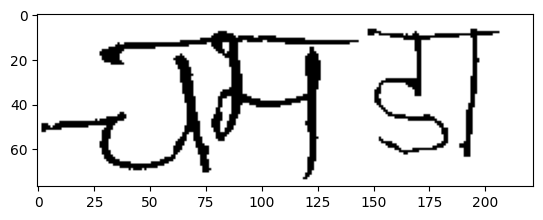

In [12]:
plt.imshow(render_word_image_from_paths(paths), cmap="gray")

#### Synthesized Pair Generation

In [13]:
def render_word_with_pairs_resized(img_paths, resize_factor=0.7, context_width=32, generation_width=128, overlap_percentage=0.15):
    """
    Renders a full word image using width-resized characters and generates
    input/target pairs for GAN training, including a corrected pair for the first character.

    Args:
        img_paths (list): List of file paths for the original character images.
        resize_factor (float): Factor to resize character width (e.g., 0.7 for 70%).
        context_width (int): Width of the context stub for pairs.
        generation_width (int): Width of the blank area in the input patch.
        overlap_percentage (float): Horizontal overlap based on *resized* widths for subsequent pairs.

    Returns:
        tuple: (final_word_image, training_pairs)
               final_word_image: uint8 numpy array (0=black, 255=white) or None if error.
               training_pairs: List of (input_patch, target_patch) tuples or empty list.
    """
    if not img_paths:
        return None, []

    patch_width = context_width + generation_width
    training_pairs = []
    final_background_color = 255
    uint64_background_val = 0

    try:
        imgs_orig = [cv2.imread(file, 0) for file in img_paths]
        if any(img is None for img in imgs_orig):
            raise ValueError(f"One or more images failed to load for paths: {img_paths}")

        word_h, letter_y_coords = getSeqPositions(img_paths)
        if word_h <= 0:
            print(f"Warning: Calculated word height is {word_h}. Cannot render.")
            return None, []
        patch_height = word_h

        imgs = []
        for img_o in imgs_orig:
            h_orig, w_orig = img_o.shape
            new_w = max(1, int(w_orig * resize_factor))
            img_resized = cv2.resize(img_o, (new_w, h_orig), interpolation=cv2.INTER_AREA)
            imgs.append(np.uint64(1 - img_resized / 255))

    except Exception as e:
        print(f"Error during image loading, getSeqPositions, or resizing: {e}")
        traceback.print_exc() # Print detailed error
        return None, []

    canvas_width_estimate = int(sum(img.shape[1] for img in imgs) * 1.1) + 50
    result_canvas = np.full((word_h, canvas_width_estimate), uint64_background_val, dtype=np.uint64)

    if not imgs: return None, [] # Safety check

    # --- Generate Pair for the FIRST character (index 0) ---
    img0 = imgs[0]
    start_y0, end_y0 = letter_y_coords[0]
    char_h0, char_w0 = img0.shape # Resized dimensions
    start_y0_p = max(0, start_y0); end_y0_p = min(patch_height, end_y0) # Clip y for patch

    # 1. Input Patch 0 (Blank)
    input_patch_0 = np.full((patch_height, patch_width), final_background_color, dtype=np.uint8)

    # 2. Target Patch 0 (First char starts AFTER context_width)
    target_patch_canvas_0 = np.full((patch_height, patch_width), uint64_background_val, dtype=np.uint64)

    # --- *** CORRECTED PLACEMENT LOGIC FOR FIRST CHARACTER *** ---
    paste_start_x_0 = context_width # Start pasting AFTER the context area
    paste_end_x_0 = min(patch_width, paste_start_x_0 + char_w0) # End pasting, clipped by patch width
    paste_width_0 = paste_end_x_0 - paste_start_x_0 # Actual width being pasted

    if paste_width_0 > 0: # Only proceed if there's width to paste
        paste_x_slice_0 = slice(paste_start_x_0, paste_end_x_0)
        img_x_slice_0 = slice(0, paste_width_0) # Corresponding slice from img0

        paste_y_slice_0 = slice(start_y0_p, end_y0_p)
        img_y_slice_0 = slice(0, end_y0_p - start_y0_p)
        # --- *** END CORRECTION *** ---

        # Paste using corrected slices
        if paste_y_slice_0.start < paste_y_slice_0.stop and paste_x_slice_0.start < paste_x_slice_0.stop and \
           img_y_slice_0.start < img_y_slice_0.stop and img_x_slice_0.start < img_x_slice_0.stop:
            try:
                target_area = target_patch_canvas_0[paste_y_slice_0, paste_x_slice_0]
                source_area = img0[img_y_slice_0, img_x_slice_0]
                if target_area.shape == source_area.shape:
                     target_patch_canvas_0[paste_y_slice_0, paste_x_slice_0] = np.bitwise_or(target_area, source_area)
                else: print(f"Shape mismatch Target Patch 0: T{target_area.shape}, S{source_area.shape}")
            except ValueError as e: print(f"Error pasting target patch 0: {e}")
        else:
             print(f"Warning: Invalid slices for pasting target patch 0.")

    target_patch_0 = (final_background_color - target_patch_canvas_0 * final_background_color).astype(np.uint8)
    training_pairs.append((input_patch_0, target_patch_0))

    # --- Place the first RESIZED image on the main canvas (starts at x=0) ---
    start_y0_c, end_y0_c = letter_y_coords[0]
    start_y0_c = max(0, start_y0_c); end_y0_c = min(word_h, end_y0_c)
    paste_w0_c = min(char_w0, result_canvas.shape[1])
    if start_y0_c < end_y0_c and paste_w0_c > 0:
        try:
            img0_slice_c = img0[0:(end_y0_c-start_y0_c), 0:paste_w0_c]
            result_canvas[start_y0_c:end_y0_c, 0:paste_w0_c] = np.bitwise_or(
                result_canvas[start_y0_c:end_y0_c, 0:paste_w0_c], img0_slice_c
            )
        except ValueError as e:
             print(f"Error pasting first char on canvas: {e}. T:{result_canvas[start_y0_c:end_y0_c, 0:paste_w0_c].shape}, S:{img0_slice_c.shape}")
             return None, training_pairs # Return pairs generated so far (only first)
    else:
        print("Warning: Invalid dimensions/coords for first char on canvas. Aborting.")
        return None, training_pairs

    advance_percentage = 1.0 - overlap_percentage
    current_paste_index = int(advance_percentage * char_w0)
    actual_content_width = char_w0

    # --- Iterate, Paste the rest (RESIZED), AND Generate SUBSEQUENT Pairs (i=1 onwards) ---
    for i in range(1, len(imgs)):
        prev_img_w = imgs[i-1].shape[1]
        img_i = imgs[i]
        char_hi, char_wi = img_i.shape
        start_yi, end_yi = letter_y_coords[i]

        start_yi = max(0, start_yi); end_yi = min(word_h, end_yi)
        if start_yi >= end_yi or char_wi <= 0:
            print(f"Warning: Skipping character {i} due to invalid dimensions/coords.")
            current_paste_index += int(advance_percentage * char_wi)
            continue

        # --- 1. Generate Pair for character 'i' (Context from i-1) ---
        # Input Patch
        input_patch = np.full((patch_height, patch_width), final_background_color, dtype=np.uint8)
        context_end_x = current_paste_index
        context_start_x = max(0, context_end_x - context_width)
        actual_ctx_w = context_end_x - context_start_x
        if actual_ctx_w > 0:
            # Ensure reading context doesn't exceed canvas bounds
            read_ctx_end = min(context_end_x, result_canvas.shape[1])
            read_ctx_start = min(context_start_x, result_canvas.shape[1])
            actual_read_ctx_w = read_ctx_end - read_ctx_start
            if actual_read_ctx_w > 0:
                 context_stub_uint64 = result_canvas[:, read_ctx_start:read_ctx_end]
                 context_stub_uint8 = (final_background_color - context_stub_uint64 * final_background_color).astype(np.uint8)
                 paste_ctx_w = min(actual_read_ctx_w, input_patch.shape[1]) # Ensure fit into patch
                 input_patch[:, 0:paste_ctx_w] = context_stub_uint8[:, :paste_ctx_w]
            else: actual_ctx_w = 0 # Correct if read resulted in zero width

        # Target Patch
        target_patch_canvas = np.full((patch_height, patch_width), uint64_background_val, dtype=np.uint64)
        if actual_ctx_w > 0: # Use the possibly corrected actual_ctx_w from read above
             paste_ctx_w = min(actual_read_ctx_w, target_patch_canvas.shape[1])
             if paste_ctx_w > 0 : # Check again after min
                  target_patch_canvas[:, 0:paste_ctx_w] = context_stub_uint64[:, :paste_ctx_w] # Use same stub as input
             else: paste_ctx_w = 0 # Reset if pasting resulted in zero width
        else: paste_ctx_w = 0 # Ensure paste_ctx_w is 0 if no context

        overlap_pixels = int(overlap_percentage * prev_img_w)
        # paste_x_in_patch depends on the actual width of context *pasted*
        paste_x_in_patch = paste_ctx_w - overlap_pixels
        paste_x_in_patch = max(0, paste_x_in_patch)

        paste_y_slice = slice(start_yi, end_yi)
        img_y_slice = slice(0, end_yi - start_yi)
        paste_x_end = min(patch_width, paste_x_in_patch + char_wi)
        paste_x_slice = slice(paste_x_in_patch, paste_x_end)
        img_x_slice = slice(0, paste_x_end - paste_x_in_patch) # Width actually pasted

        if paste_y_slice.start < paste_y_slice.stop and paste_x_slice.start < paste_x_slice.stop and \
           img_y_slice.start < img_y_slice.stop and img_x_slice.start < img_x_slice.stop:
            try:
                target_area = target_patch_canvas[paste_y_slice, paste_x_slice]
                source_area = img_i[img_y_slice, img_x_slice]
                if target_area.shape == source_area.shape:
                    target_patch_canvas[paste_y_slice, paste_x_slice] = np.bitwise_or(target_area, source_area)
                else: print(f"Shape mismatch Target Patch {i}: T{target_area.shape}, S{source_area.shape}")
            except ValueError as e: print(f"Error pasting target patch {i}: {e}")
        else:
             print(f"Warning: Invalid slices for pasting target patch {i}.")


        target_patch = (final_background_color - target_patch_canvas * final_background_color).astype(np.uint8)
        training_pairs.append((input_patch, target_patch))


        # --- 2. Paste RESIZED character 'i' onto the main result_canvas ---
        paste_x_start_main = current_paste_index
        paste_x_end_main = paste_x_start_main + char_wi

        if paste_x_end_main > result_canvas.shape[1]:
            padding = paste_x_end_main - result_canvas.shape[1] + 50
            result_canvas = np.pad(result_canvas, ((0,0), (0, padding)), mode='constant', constant_values=uint64_background_val)

        main_paste_y_slice = slice(start_yi, end_yi)
        main_paste_x_slice = slice(paste_x_start_main, paste_x_end_main)
        main_img_y_slice = slice(0, end_yi - start_yi)
        main_img_x_slice = slice(0, char_wi)

        if main_paste_y_slice.start < main_paste_y_slice.stop and main_paste_x_slice.start < main_paste_x_slice.stop and \
           main_img_y_slice.start < main_img_y_slice.stop and main_img_x_slice.start < main_img_x_slice.stop:
            try:
                target_area_main = result_canvas[main_paste_y_slice, main_paste_x_slice]
                source_area_main = img_i[main_img_y_slice, main_img_x_slice]
                if target_area_main.shape == source_area_main.shape:
                    result_canvas[main_paste_y_slice, main_paste_x_slice] = np.bitwise_or(target_area_main, source_area_main)
                else: print(f"Shape mismatch Main Canvas {i}: T{target_area_main.shape}, S{source_area_main.shape}")
            except ValueError as e: print(f"Error pasting main canvas {i}: {e}")
        else:
            print(f"Warning: Invalid slices for pasting main canvas {i}.")


        current_paste_index += int(advance_percentage * char_wi)
        actual_content_width = max(actual_content_width, paste_x_end_main)

    # --- Finalize and Return ---
    # Ensure actual_content_width is valid before slicing
    actual_content_width = max(1, actual_content_width) # Avoid zero width
    final_word_canvas_uint64 = result_canvas[:, :actual_content_width]
    final_word_image_uint8 = (final_background_color - final_word_canvas_uint64 * final_background_color).astype(np.uint8)

    return final_word_image_uint8, training_pairs

Final Rendered Image Shape (using resized chars): (77, 148)


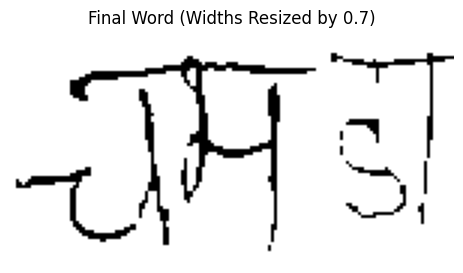


Generated 3 pairs for training (Context=32, Gen=128).


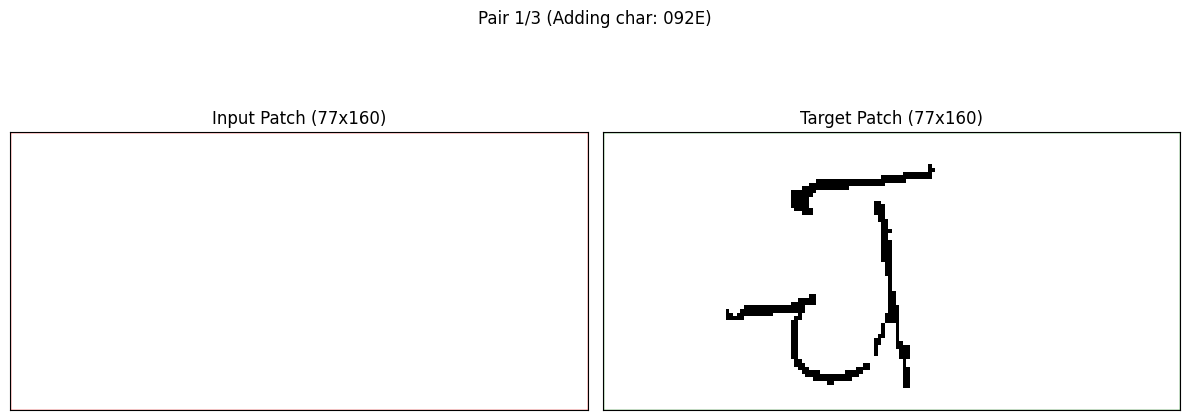

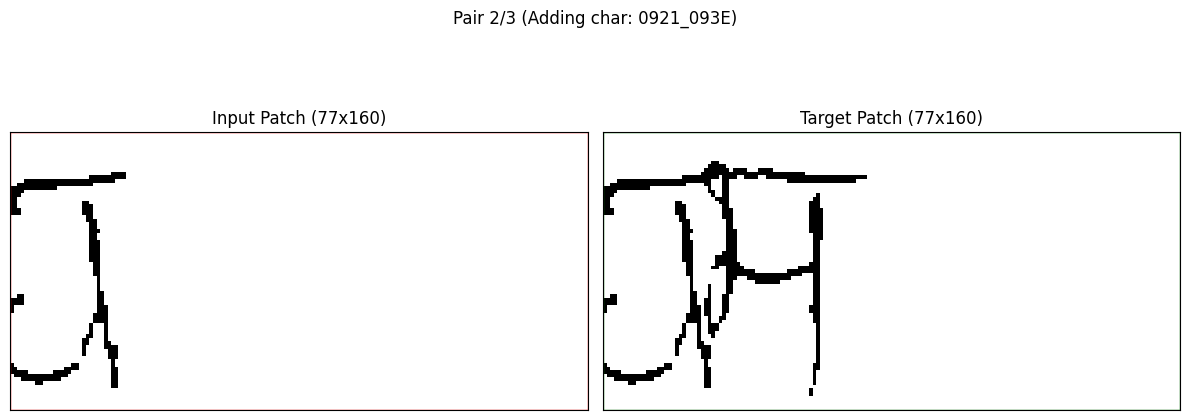

An unexpected error occurred during example execution: list index out of range


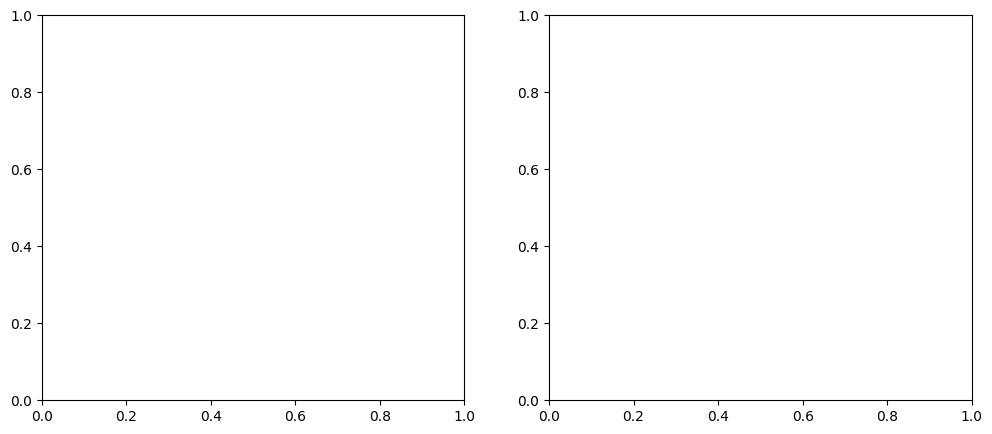

In [14]:
context_width = 32
generation_width = 128
patch_width = context_width + generation_width # = 160
resize_factor = 0.7
# --------------------------

try:
    final_image, pairs = render_word_with_pairs_resized(
        paths,
        resize_factor=resize_factor,
        context_width=context_width,
        generation_width=generation_width,
        overlap_percentage=0.15*0.7
    )

    if final_image is not None:
        print(f"Final Rendered Image Shape (using resized chars): {final_image.shape}")
        plt.figure(figsize=(10, 3))
        plt.imshow(final_image, cmap='gray')
        plt.title(f"Final Word (Widths Resized by {resize_factor})")
        plt.axis('off')
        plt.show()
    else:
            print("Failed to render final image.")

    print(f"\nGenerated {len(pairs)} pairs for training (Context={context_width}, Gen={generation_width}).")

    # Display pairs
    if not pairs:
            print("No pairs were generated.")
    else:
            patch_height = pairs[0][0].shape[0]
            for i, (input_p, target_p) in enumerate(pairs):
                fig, axes = plt.subplots(1, 2, figsize=(12, 5))
                fig.suptitle(f"Pair {i+1}/{len(pairs)} (Adding char: {os.path.basename(os.path.dirname(paths[i+1]))})")

                # Input Patch
                axes[0].imshow(input_p, cmap='gray', vmin=0, vmax=255)
                axes[0].set_title(f'Input Patch ({input_p.shape[0]}x{input_p.shape[1]})')
                axes[0].axhline(y=-0.5, color='red', lw=1); axes[0].axhline(y=patch_height-0.5, color='red', lw=1)
                axes[0].axvline(x=-0.5, color='red', lw=1); axes[0].axvline(x=patch_width-0.5, color='red', lw=1) # Use new patch_width
                axes[0].set_xticks([]); axes[0].set_yticks([])

                # Target Patch
                axes[1].imshow(target_p, cmap='gray', vmin=0, vmax=255)
                axes[1].set_title(f'Target Patch ({target_p.shape[0]}x{target_p.shape[1]})')
                axes[1].axhline(y=-0.5, color='green', lw=1); axes[1].axhline(y=patch_height-0.5, color='green', lw=1)
                axes[1].axvline(x=-0.5, color='green', lw=1); axes[1].axvline(x=patch_width-0.5, color='green', lw=1) # Use new patch_width
                axes[1].set_xticks([]); axes[1].set_yticks([])

                plt.tight_layout(rect=[0, 0.03, 1, 0.95])
                plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An unexpected error occurred during example execution: {e}")

#### Pair Resizing and Inversion

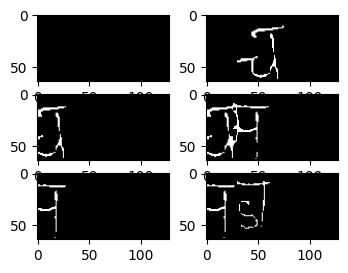

In [15]:
def binarize(img, threshold=127):
    return cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)[1]


def invert_if_needed(img):
    # Make sure foreground is 0
    if np.mean(img) > 127:
        return 255 - img
    return img


def resize_and_safe_dilate(img, height, width, kernel_size=2):
    img = binarize(img)
    img = invert_if_needed(img)

    resized = cv2.resize(img, (width, height), interpolation=cv2.INTER_NEAREST)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated = cv2.dilate(resized, kernel, iterations=2)
    eroded = cv2.erode(dilated, kernel, iterations=2)
    # print(type(eroded))
    return eroded  # invert back if needed


images_count = len(np.array(pairs))
# print(images_count)
plt.figure(figsize=(4, 2 * images_count))
for i in range(images_count):
    plt.subplot(2 * images_count, 2, (2 * i) + 1), plt.imshow(resize_and_safe_dilate(np.array(pairs)[i][0], 64, 128), cmap="gray")
    plt.subplot(2 * images_count, 2, (2 * i) + 2), plt.imshow(resize_and_safe_dilate(np.array(pairs)[i][1], 64, 128), cmap="gray")
# plt.imshow(resize_and_safe_dilate(np.array(pairs)[3][1], 64, 128), cmap="gray")

#### Streamlining Workflow and Temporal Benchmarking

read words from file and generate paths


In [30]:
def read_words_from_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        words = [line.strip() for line in file if line.strip()]
    return words

words = read_words_from_file('../annotations.txt')
# words = words[:10]
print(len(words))

generatedPaths = []

for word in words:
    try:
        unicodes = getLetterTokens(word)[0]
        path = generate_char_image_paths("ProcessedCALAM", unicodes)
        generatedPaths.append({word: path})
    except Exception as e:
        print(word)

205541
ढंकती
रंगढंग
ढंकना
ढंकने
ढंक
ढंकने
ढंकी
ढंके
ढंग
बेढंग
ढंगी
बेढंगी
ढंढ
ढंढोरा
ढंढोरे
ढंढोरे
ढंढोरिया
ढंढोरची
ढंगदार
ढंढस
बेढंग
बेढंगा
बेढंगी
बेढंगे
कुढंगापन
ढंढार
सुढंगी
कुढंग
कुढंगा
कुढंगी
बेढंगापन
बेढंगापना
मनगढंत


generate image pairs

In [36]:
context_width = 32
generation_width = 128
patch_width = context_width + generation_width # = 160
resize_factor = 0.7

genPath = "./LetterClassPairs"

print(len(generatedPaths))

perc_1 = 205508 // 10

word_idx = 0

classes_globall = {}

for words in generatedPaths:
    word = list(words.keys())[0]
    letter_paths = list(words.values())[0]
    
    # generate image and pairs
    final_image, pairs = render_word_with_pairs_resized(
        letter_paths,
        resize_factor=resize_factor,
        context_width=context_width,
        generation_width=generation_width,
        overlap_percentage=0.15*0.7
    )
    final_image = np.array(final_image)
    image_pairs = []
    for context, generated in pairs:
        context_resized, gen_resized = resize_and_safe_dilate(context, 64, 128), resize_and_safe_dilate(generated, 64, 128)
        image_pairs.append(np.hstack((context_resized, gen_resized)))
    
    classes = []
    for letter_path in letter_paths:
        classes.append(letter_path.split("\\")[1])

    if len(image_pairs) != len(classes):
        print(f"  ERROR: Mismatch! Got {len(image_pairs)} processed pairs but {len(classes)} classes for word {word}. Cannot save pairs accurately.")
        word_idx += 1
        continue # Skip saving for this word

    classes = classes[1:]
    image_pairs = image_pairs[1:]
    for pair_idx, (pair_image, class_name) in enumerate(zip(image_pairs, classes)):

        if(class_name in classes_globall.keys()):
            if(classes_globall[class_name] > 1000): continue
        else: classes_globall[class_name] = 0

        # Skip if resizing/stacking failed for this pair
        if pair_image is None:
             print(f"    Skipping save for pair {pair_idx} (class '{class_name}') due to earlier processing error.")
             continue

        try:
            # Define target directory for this class
            target_dir = os.path.join(genPath, class_name)

            # Create the directory if it doesn't exist
            os.makedirs(target_dir, exist_ok=True)

            # Create a unique filename (e.g., word index + pair index within word)
            # You could add timestamps or UUIDs for guaranteed uniqueness if needed
            filename = f"word{word_idx}_pair{pair_idx}_{class_name}.png"
            output_path = os.path.join(target_dir, filename)

            # Save the stacked image
            success = cv2.imwrite(output_path, pair_image)
            if success:
                classes_globall[class_name] += 1
            else:
                print(f"    Warning: Failed to save image to {output_path}")

        except Exception as e:
            print(f"    Error saving pair {pair_idx} for class '{class_name}' (Word {word_idx}): {e}")
            traceback.print_exc()
    
    word_idx += 1
    if(word_idx % perc_1 == 0):
        print(f"{round((word_idx / 205508) * 100, 2)}% completed")

205508
10.0% completed
20.0% completed
30.0% completed
40.0% completed
50.0% completed
60.0% completed
70.0% completed
80.0% completed
90.0% completed
100.0% completed


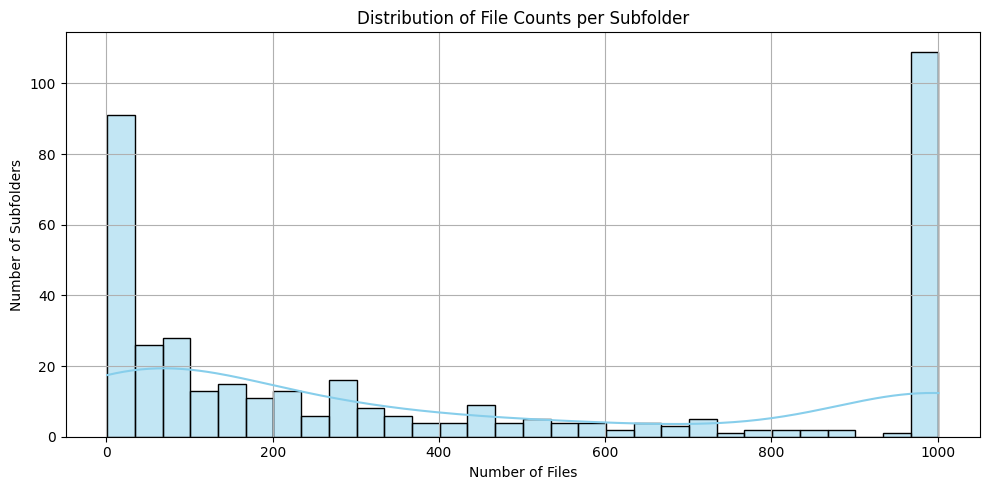


📊 Statistical Summary:
Total subfolders: 400
Mean: 418.47
Median: 243.5
Standard Deviation: 405.24
Min: 1
Max: 1001
25th Percentile: 40.5
75th Percentile: 1001.0


In [37]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_file_distribution_stats(parent_folder):
    subfolder_file_counts = []

    for subfolder in os.listdir(parent_folder):
        full_path = os.path.join(parent_folder, subfolder)
        if os.path.isdir(full_path):
            num_files = len([f for f in os.listdir(full_path)
                             if os.path.isfile(os.path.join(full_path, f))])
            subfolder_file_counts.append(num_files)

    # Convert to numpy array for stats
    counts = np.array(subfolder_file_counts)

    # Plotting
    plt.figure(figsize=(10, 5))
    sns.histplot(counts, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of File Counts per Subfolder')
    plt.xlabel('Number of Files')
    plt.ylabel('Number of Subfolders')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Statistics
    print("\n📊 Statistical Summary:")
    print(f"Total subfolders: {len(counts)}")
    print(f"Mean: {np.mean(counts):.2f}")
    print(f"Median: {np.median(counts)}")
    print(f"Standard Deviation: {np.std(counts):.2f}")
    print(f"Min: {np.min(counts)}")
    print(f"Max: {np.max(counts)}")
    print(f"25th Percentile: {np.percentile(counts, 25)}")
    print(f"75th Percentile: {np.percentile(counts, 75)}")

# Usage
folder_path = "./LetterClassPairs"
plot_file_distribution_stats(folder_path)


#### **inflate imbalanced classes**

##### Get class names and remaining amounts (max 1000 per class)

In [16]:
def get_imbalanced_count_per_class(base_folder, threshold):
    counts = {}
    for subfolder in os.listdir(base_folder):
        subfolder_path = os.path.join(base_folder, subfolder)
        if os.path.isdir(subfolder_path):
            file_count = sum(os.path.isfile(os.path.join(subfolder_path, f)) for f in os.listdir(subfolder_path))
            if(file_count < threshold):
                counts[subfolder] = threshold - file_count
    return counts

def get_random_file_pair(base_dir, query_folder_name):
    # 1. List subfolders and identify others
    all_subfolders = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    other_folders = [f for f in all_subfolders if f != query_folder_name]

    # 2. Get random file from query folder
    query_folder_path = os.path.join(base_dir, query_folder_name)
    query_files = [f for f in os.listdir(query_folder_path) if os.path.isfile(os.path.join(query_folder_path, f))]
    query_file = random.choice(query_files)
    query_file_path = os.path.join(query_folder_path, query_file)

    # 3. Get random file from a random *other* folder
    chosen_other_folder_name = random.choice(other_folders)
    other_folder_path = os.path.join(base_dir, chosen_other_folder_name)
    other_files = [f for f in os.listdir(other_folder_path) if os.path.isfile(os.path.join(other_folder_path, f))]
    other_file = random.choice(other_files)
    other_file_path = os.path.join(other_folder_path, other_file)

    return query_file_path, other_file_path

In [17]:
class_dict = get_imbalanced_count_per_class("LetterClassPairs", 1000)

##### Generate paths for remaining images per class

In [18]:
# Assume resize_and_safe_dilate and render_word_with_pairs_resized are defined

def scan_dir(base_dir):
    class_files_map = defaultdict(list)
    all_folder_names = []
    for entry in os.scandir(base_dir):
        if entry.is_dir():
            folder_name = entry.name
            all_folder_names.append(folder_name)
            folder_path = entry.path
            for file_entry in os.scandir(folder_path):
                if file_entry.is_file():
                    class_files_map[folder_name].append(file_entry.path)
    return class_files_map, all_folder_names

def get_deficit(counts_map, threshold):
    counts = {}
    for class_name, files in counts_map.items():
        count = len(files)
        if 0 < count < threshold:
            counts[class_name] = threshold - count
    return counts

def get_pair(class_files_map, all_folders, query_folder):
    query_files = class_files_map[query_folder]
    query_file = random.choice(query_files)
    other_folders = [f for f in all_folders if f != query_folder]
    while True:
        other_folder = random.choice(other_folders)
        other_files = class_files_map.get(other_folder)
        if other_files:
            other_file = random.choice(other_files)
            return query_file, other_file
        else:
             other_folders.remove(other_folder) # Should not happen often if pre-scanned

# --- Main Logic ---
threshold = 1000
source_pairs_dir = "LetterClassPairs"
source_chars_dir = "ProcessedCALAM"

char_files_map, all_char_folders = scan_dir(source_chars_dir)
pair_counts_map, _ = scan_dir(source_pairs_dir)
class_deficit_dict = get_deficit(pair_counts_map, threshold)
idx = 0
inflated_samples = {}
for class_name, iterations_needed in class_deficit_dict.items():
    # print(class_name)
    if class_name not in char_files_map: continue # Basic check
    for _ in range(iterations_needed):
        rare_file, other_file = get_pair(char_files_map, all_char_folders, class_name)
        inflated_samples[str(idx)] = [other_file, rare_file] # Store as (other, rare)
        idx += 1

In [19]:
len(inflated_samples)

232716

In [20]:
class_dict.items()

dict_items([('0905', 569), ('0905_0902', 958), ('0909', 551), ('090A', 707), ('0910', 901), ('0914', 983), ('0915_0942', 638), ('0915_0948', 914), ('0915_094C', 895), ('0915_094D_0937_0903', 999), ('0915_094D_0937_093E', 703), ('0915_094D_0937_0940', 783), ('0915_094D_0937_0941', 879), ('0915_094D_0937_0942', 998), ('0915_094D_0937_0947', 785), ('0915_094D_0937_0948', 999), ('0915_094D_0937_094B', 956), ('0915_094D_0937_094C', 995), ('0916_093F', 341), ('0916_0941', 761), ('0916_0942', 981), ('0916_0948', 974), ('0916_094B', 754), ('0916_094C', 958), ('0916_094D', 517), ('0917_093F', 339), ('0917_0941', 112), ('0917_0942', 916), ('0917_0948', 962), ('0917_094B', 418), ('0917_094C', 919), ('0918_093E', 538), ('0918_093F', 872), ('0918_0940', 964), ('0918_0941', 732), ('0918_0942', 994), ('0918_0947', 931), ('0918_0948', 997), ('0918_094B', 919), ('0918_094C', 994), ('0918_094D', 756), ('0919', 987), ('0919_093F', 999), ('0919_0940', 999), ('091A_0902', 892), ('091A_0940', 485), ('091A_0

##### Save images to class paths inflating dataset to 1000 samples per class

In [22]:
context_width = 32
generation_width = 128
patch_width = context_width + generation_width # = 160
resize_factor = 0.7

genPath = "./LetterClassPairs"

print(len(inflated_samples))

perc_1 = len(inflated_samples) // 100

word_idx = 0

cur_Class = None

classes_globall = {}

for word in inflated_samples.keys():
    letter_paths = list(inflated_samples.values())[word_idx]
    # print(letter_paths)
    # break
    
    # generate image and pairs
    final_image, pairs = render_word_with_pairs_resized(
        letter_paths,
        resize_factor=resize_factor,
        context_width=context_width,
        generation_width=generation_width,
        overlap_percentage=0.15*0.7
    )
    final_image = np.array(final_image)
    image_pairs = []

    # break
    for context, generated in pairs:
        context_resized, gen_resized = resize_and_safe_dilate(context, 64, 128), resize_and_safe_dilate(generated, 64, 128)
        image_pairs.append(np.hstack((context_resized, gen_resized)))
    
    classes = []
    for letter_path in letter_paths:
        classes.append(letter_path.split("\\")[1])

    if len(image_pairs) != len(classes):
        print(f"  ERROR: Mismatch! Got {len(image_pairs)} processed pairs but {len(classes)} classes for word {word}. Cannot save pairs accurately.")
        word_idx += 1
        continue # Skip saving for this word

    classes = classes[1:]
    image_pairs = image_pairs[1:]
    for pair_idx, (pair_image, class_name) in enumerate(zip(image_pairs, classes)):
        if(class_name in classes_globall.keys()):
            if(classes_globall[class_name] > 1000): continue
        else: classes_globall[class_name] = 0

        # Skip if resizing/stacking failed for this pair
        if pair_image is None:
             print(f"    Skipping save for pair {pair_idx} (class '{class_name}') due to earlier processing error.")
             continue

        try:
            # Define target directory for this class
            target_dir = os.path.join(genPath, class_name)
            # print(target_dir)

            # Create the directory if it doesn't exist
            os.makedirs(target_dir, exist_ok=True)

            # Create a unique filename (e.g., word index + pair index within word)
            # You could add timestamps or UUIDs for guaranteed uniqueness if needed
            filename = f"word{word_idx}_pair{pair_idx}_{class_name}.png"
            output_path = os.path.join(target_dir, filename)

            # Save the stacked image
            success = cv2.imwrite(output_path, pair_image)
            if success:
                classes_globall[class_name] += 1
            else:
                print(f"    Warning: Failed to save image to {output_path}")

        except Exception as e:
            print(f"    Error saving pair {pair_idx} for class '{class_name}' (Word {word_idx}): {e}")
            traceback.print_exc()
    
    word_idx += 1
    if(word_idx % perc_1 == 0):
        print(f"{round((word_idx / 205508) * 100, 2)}% completed")

232716
1.13% completed
2.26% completed
3.4% completed
4.53% completed
5.66% completed
6.79% completed
7.93% completed
9.06% completed
10.19% completed
11.32% completed
12.46% completed
13.59% completed
14.72% completed
15.85% completed
16.98% completed
18.12% completed
19.25% completed
20.38% completed
21.51% completed
22.65% completed
23.78% completed
24.91% completed
26.04% completed
27.18% completed
28.31% completed
29.44% completed
30.57% completed
31.7% completed
32.84% completed
33.97% completed
35.1% completed
36.23% completed
37.37% completed
38.5% completed
39.63% completed
40.76% completed
41.9% completed
43.03% completed
44.16% completed
45.29% completed
46.42% completed
47.56% completed
48.69% completed
49.82% completed
50.95% completed
52.09% completed
53.22% completed
54.35% completed
55.48% completed
56.62% completed
57.75% completed
58.88% completed
60.01% completed
61.15% completed
62.28% completed
63.41% completed
64.54% completed
65.67% completed
66.81% completed
67.

##### Remove useless words from annotations.txt


In [24]:
import os

def find_unique_subfolders(folder1, folder2):

    unique = []
    subfolders1 = set(os.listdir(folder1))
    subfolders2 = set(os.listdir(folder2))

    # Only keep directories (filter out files)
    subfolders1 = {f for f in subfolders1 if os.path.isdir(os.path.join(folder1, f))}
    subfolders2 = {f for f in subfolders2 if os.path.isdir(os.path.join(folder2, f))}

    only_in_1 = subfolders1 - subfolders2
    only_in_2 = subfolders2 - subfolders1

    if only_in_1:
        print("Subfolders only in folder1:")
        for f in sorted(only_in_1):
            print("  ", f)
    if only_in_2:
        print("Subfolders only in folder2:")
        for f in sorted(only_in_2):
            print("  ", f)
            unique.append(f)
    return unique

# Example usage
unique = find_unique_subfolders("LetterClassPairs", "./ProcessedCALAM")


Subfolders only in folder2:
   0905_0903
   0919_0902
   0919_0903
   0919_093E
   0919_0941
   0919_0942
   0919_0947
   0919_0948
   0919_094B
   0919_094C
   091A_0903
   091B_0903
   091C_094D_091E_0902
   091C_094D_091E_0903
   091C_094D_091E_0941
   091C_094D_091E_0942
   091C_094D_091E_0948
   091C_094D_091E_094C
   091D_0903
   091E
   091E_0902
   091E_0903
   091E_093E
   091E_0940
   091E_0942
   091E_0947
   091E_0948
   091E_094C
   091F_0903
   0920_0903
   0922_0903
   0926_0902_0903
   092B_0903
   092C_0903
   092E_0948_0902
   0935_0903
   0937_0903
   0937_094C
   0967
   096C
   096D
   096E
   096F


remove the sampels from annotations that dont have these letters

In [28]:
def unicode_to_hindi(text):
    parts = text.split("_")
    chars = [chr(int(code, 16)) for code in parts]
    return "".join(chars)

invalid_letters = []
for i in unique:
    invalid_letters.append(unicode_to_hindi(i))

def clean_hindi_words(input_path, output_path, banned_chars):
    with open(input_path, "r", encoding="utf-8") as f:
        words = f.read().splitlines()

    # Remove words containing any of the banned characters
    filtered_words = [word for word in words if all(char not in banned_chars for char in word)]

    # Save the clean list
    with open(output_path, "w", encoding="utf-8") as f:
        for word in filtered_words:
            f.write(word + "\n")

    print(f"Saved {len(filtered_words)} words to {output_path} (removed {len(words) - len(filtered_words)}).")

clean_hindi_words("./annotations_old.txt", "./annotations.txt", invalid_letters)

Saved 204489 words to ./annotations.txt (removed 1052).


#### **Save Images in combined files**

In [34]:
def load_image(image_path, expected_height, expected_width):
    """Loads a grayscale image using OpenCV."""
    try:
        # IMREAD_GRAYSCALE ensures loading as single channel
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Warning: Failed to load image {image_path}. Skipping.")
            return None
        # Optional: Re-binarize just in case, though source says they are already
        # _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        if img.shape != (expected_height, expected_width):
            print(f"Warning: Image {image_path} has unexpected shape {img.shape}. Expected {(expected_height, expected_width)}. Skipping.")
            return None
        return img # Returns np.uint8 array
    except Exception as e:
        print(f"Error loading image {image_path} with OpenCV: {e}")
        traceback.print_exc()
        return None

In [39]:
# --- Configuration ---
SOURCE_BASE_DIR = "LetterClassPairs"  # CHANGE THIS: Root folder containing class subfolders
OUTPUT_DIR = "LetterClassPairsCompressed" # CHANGE THIS: Where to save the .npy files
IMAGES_PER_ROW = 100
EXPECTED_HEIGHT = 64
EXPECTED_WIDTH = 256
BACKGROUND_COLOR = 0 # White background for padding
IMAGE_EXTENSION = ".png"
# ---------------------

def create_consolidated_dataset(source_dir, output_dir, img_per_row, height, width, bg_color):
    """
    Consolidates images from class subfolders into NumPy arrays,
    showing progress per class.
    """
    print(f"Source Directory: {os.path.abspath(source_dir)}")
    print(f"Output Directory: {os.path.abspath(output_dir)}")
    print(f"Images per Row: {img_per_row}")
    print(f"Expected Image Size: {height}x{width}")
    print("-" * 30)

    if not os.path.isdir(source_dir):
        print(f"Error: Source directory '{source_dir}' not found or not a directory.")
        return

    os.makedirs(output_dir, exist_ok=True)
    print(f"Created or found output directory: {output_dir}")

    class_folders = sorted([d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]) # Sort for consistent order

    if not class_folders:
        print(f"Error: No subdirectories (class folders) found in '{source_dir}'.")
        return

    print(f"Found {len(class_folders)} potential class folders.")

    # --- Main progress bar iterates through classes ---
    for class_name in tqdm(class_folders, desc="Processing Classes", unit="class"):
        class_path = os.path.join(source_dir, class_name)
        # Optional: print class name here if needed, but tqdm shows it
        # print(f"\nProcessing Class: {class_name}")

        try:
            all_files = [f for f in os.listdir(class_path) if f.lower().endswith(IMAGE_EXTENSION)]
            image_paths = [os.path.join(class_path, f) for f in all_files]

            if not image_paths:
                # Log this warning if needed, but don't clutter the tqdm output too much unless debugging
                # print(f"Warning: No '{IMAGE_EXTENSION}' images found in '{class_path}'. Skipping class.")
                continue

            num_total_images = len(image_paths)
            # print(f"Found {num_total_images} images for class '{class_name}'.") # Optional verbose output

            num_rows = math.ceil(num_total_images / img_per_row)
            row_width = width * img_per_row
            consolidated_rows = []

            image_iterator = iter(image_paths)
            processed_count = 0

            # --- Loop through rows WITHOUT inner tqdm ---
            for r in range(num_rows):
                current_row_images = []
                images_in_this_row = 0
                for _ in range(img_per_row):
                    try:
                        img_path = next(image_iterator)
                        img_array = load_image(img_path, height, width)
                        if img_array is not None:
                            current_row_images.append(img_array)
                            images_in_this_row += 1
                            processed_count += 1
                        else:
                            pass # Image loading failed or skipped
                    except StopIteration:
                        break # End of images for this class
                    except Exception as load_err:
                         print(f"\nError processing an image in row {r} for class {class_name}: {load_err}") # Print errors clearly

                if not current_row_images:
                    # print(f"Warning: Row {r} for class {class_name} ended up empty. Skipping row.") # Optional debug
                    continue # Skip empty rows

                concatenated_row = np.concatenate(current_row_images, axis=1)

                actual_width = concatenated_row.shape[1]
                if actual_width < row_width:
                    padding_width = row_width - actual_width
                    padding = np.full((height, padding_width), bg_color, dtype=np.uint8)
                    concatenated_row = np.concatenate([concatenated_row, padding], axis=1)

                consolidated_rows.append(concatenated_row)
            # --- End of row loop ---

            if not consolidated_rows:
                 # print(f"\nError: No valid rows could be created for class {class_name}. No output file generated.") # Optional error
                 continue

            final_array = np.stack(consolidated_rows, axis=0)
            output_filename = f"{class_name}_{processed_count}_images.npy"
            output_path = os.path.join(output_dir, output_filename)

            # Optional: print verbose output outside the main loop if desired
            # print(f"  Final array shape for '{class_name}': {final_array.shape}")
            # print(f"  Saving to: {output_path}")
            np.save(output_path, final_array)

        except Exception as e:
            # Use tqdm.write to print errors without messing up the progress bar
            tqdm.write(f"\n---!!! Unexpected Error processing class '{class_name}' !!!---")
            tqdm.write(f"Error: {e}")
            # traceback.print_exc() # Use traceback for debugging if needed
            tqdm.write(f"--- Skipping to next class ---")


    print("\nProcessing Complete.")

In [40]:
if "path/to/" in SOURCE_BASE_DIR or "path/to/" in OUTPUT_DIR:
        print("ERROR: Please update SOURCE_BASE_DIR and OUTPUT_DIR variables in the script before running.")
else:
    create_consolidated_dataset(
        source_dir=SOURCE_BASE_DIR,
        output_dir=OUTPUT_DIR,
        img_per_row=IMAGES_PER_ROW,
        height=EXPECTED_HEIGHT,
        width=EXPECTED_WIDTH,
        bg_color=BACKGROUND_COLOR
    )

Source Directory: c:\Users\devbh\OneDrive\Desktop\College\Research\LekhaGAN - Hindi Hnadwritten Text Synthesis\Dataset Generation\LetterClassPairs
Output Directory: c:\Users\devbh\OneDrive\Desktop\College\Research\LekhaGAN - Hindi Hnadwritten Text Synthesis\Dataset Generation\LetterClassPairsCompressed
Images per Row: 100
Expected Image Size: 64x256
------------------------------
Created or found output directory: LetterClassPairsCompressed
Found 400 potential class folders.


Processing Classes: 100%|██████████| 400/400 [26:30<00:00,  3.98s/class]


Processing Complete.
